# Title

## Introduction

Begin by providing some relevant background information on the topic so that someone unfamiliar with it will be prepared to understand the rest of your proposal.

Clearly state the question you will try to answer with your project. Your question should involve one or more random variables of interest, spread across two or more categories that are interesting to compare. For example, you could consider the annual maxima river flow at two different locations along a river, or perhaps gender diversity at different universities. Of the response variable, identify one location parameter (mean, median, quantile, etc.) and one scale parameter (standard deviation, inter-quartile range, etc.) that would be useful in answering your question. Justify your choices.

UPDATE (Mar 1, 2022): If it doesn’t make sense to infer a scale parameter, you can choose another parameter, or choose a second variable altogether. Ultimately, we’re looking for a comprehensive inference analysis on one parameter spread across 2+ groups (with at least one hypothesis test), plus a bit more (such as an investigation on the variance, a quantile, or a different variable). In total, you should use both bootstrapping and asymptotics somewhere in your report at least once each. Also, your hypothesis test(s) need not be significant: it is perfectly fine to write a report claiming no significant findings (i.e. your p-value is large).

Identify and describe the dataset that will be used to answer the question. Remember, this dataset is allowed to contain more variables than you need – feel free to drop them!

Also, be sure to frame your question/objectives in terms of what is already known in the literature. Be sure to include at least two scientific publications that can help frame your study (you will need to include these in the References section). We have no specific citation style requirements, but be consistent.

- Background information: Why is it important? Cite some relevant literature


- What is your (inferential) research question?


- What is your population of interest?


- How do you collect your data?


- What is your point estimate? (e.g., mean difference between male and female income, proportions of Democrats voters, etc.)


- State your hypothesis if applicable


With only about 8.3 percent of the population not being insured at any point in the past year, health insurance has a widespread impact on the American population (Keisler-Starkey & Bunch, 2022). With factors influencing insurance premius such as age, state and federal laws, and many more, there are many considerations insurance companies make to determine their prices. Many companies will also take insurance premiums out of employees pay to cover these costs, so it is important for employees to know the major contributors to their insurance costs, and the actions that can take to reduce them (Fontinelle, 2022). For this reason, we decided to explore if people who smoke are charged more for health insurance than those who do not in the United States, as this is one of few variables impacting insurance costs that people can actually control. Our population of interest is people in the United States who have health insurance policies. To answer our inferential question, we will calculate the mean difference between yearly insurance charges of smokers versus non smokers as our point estimate, using the null hypothesis that there is no difference in charges and the alternative hypothesis that charges are greater for smokers. Our data has been collected from the US Health Insurance Dataset and contains 1338 rows of data on peoples age, sex, smoking status (yes or no), insurance charges, and others.

## Preliminary Results

In [1]:
# Run this cell before continuing.
library(tidyverse)
library(datateachr)
library(repr)
library(digest)
library(infer)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6      ✔ purrr   0.3.4 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.2      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In this section, you will:

Demonstrate that the dataset can be read from the web into R.
Clean and wrangle your data into a tidy format.
Plot the relevant raw data, tailoring your plot in a way that addresses your question.
Compute estimates of the parameter you identified across your groups. Present this in a table. If relevant, include these estimates in your plot.
Be sure to not print output that takes up a lot of screen space.


In [2]:
# Read in dataset
insurance <- read_csv("https://raw.githubusercontent.com/Yuji03b/STAT-201-GROUP-1/main/insurance.csv")

head(insurance)

Rows: 1338 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): sex, smoker, region
dbl (4): age, bmi, children, charges

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


age,sex,bmi,children,smoker,region,charges
<dbl>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
19,female,27.900,0,yes,southwest,16884.924
18,male,33.770,1,no,southeast,1725.552
28,male,33.000,3,no,southeast,4449.462
33,male,22.705,0,no,northwest,21984.471
32,male,28.880,0,no,northwest,3866.855
31,female,25.740,0,no,southeast,3756.622


The columns in the dataset are:
1. `Age`: Age of primary beneficiary

2. `Sex`: Insurance contractor gender, female / male

3. `bmi`: Body mass index

4. `children`: Number of children covered by health insurance / Number of dependents

5. `smoker`: Whether beneficiary is a smoker or not

6. `region`: The beneficiary's residential area in the US.

7. `charges`: Individual medical costs billed by health insurance.

In [3]:
# Describe columns of interest
summary(insurance |> select(smoker, charges))

    smoker             charges     
 Length:1338        Min.   : 1122  
 Class :character   1st Qu.: 4740  
 Mode  :character   Median : 9382  
                    Mean   :13270  
                    3rd Qu.:16640  
                    Max.   :63770  

Looking at the dataset, we need to make sure that there is an even distribution of sex represented in both smoking and non smoking groups as well as the mean and distribution of bmi. This is because there are studies that suggest sex and BMI could lead to higher charges so we want to make sure there is an even representation of these groups. We want to be able to conclude that that the difference in charges is between smoker and non-smoker and not affected by anything else. Additionally, we also want to check that the number of dependents under a beneficiary's insurance doesn't affect the charges.

In [4]:
charges_dependents <- insurance %>%
    group_by(children) %>%
    summarize(mean = mean(charges))
charges_dependents

children,mean
<dbl>,<dbl>
0,12365.976
1,12731.172
2,15073.564
3,15355.318
4,13850.656
5,8786.035


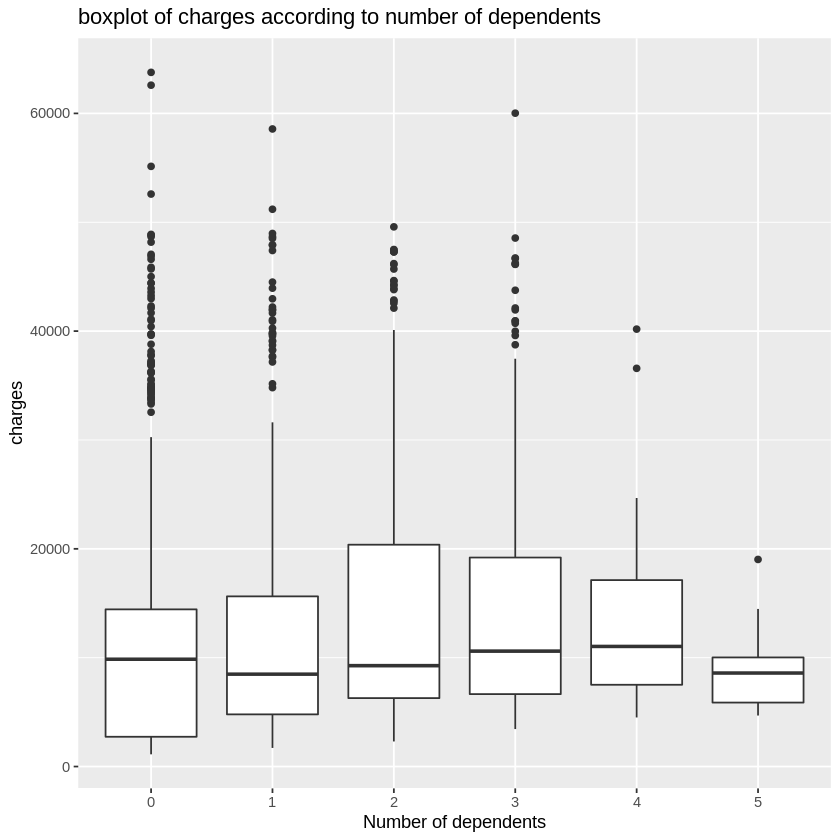

In [5]:
plot2 <- ggplot(insurance, aes(x=as.factor(children), y=charges)) +
    geom_boxplot() +
    ggtitle("boxplot of charges according to number of dependents") +
    xlab("Number of dependents")
plot2

In [6]:
count <- insurance %>%
    group_by(smoker, children) %>%
    summarize(count = n())

count

`summarise()` has grouped output by 'smoker'. You can override using the
`.groups` argument.


smoker,children,count
<chr>,<dbl>,<int>
no,0,459
no,1,263
no,2,185
no,3,118
no,4,22
no,5,17
yes,0,115
yes,1,61
yes,2,55


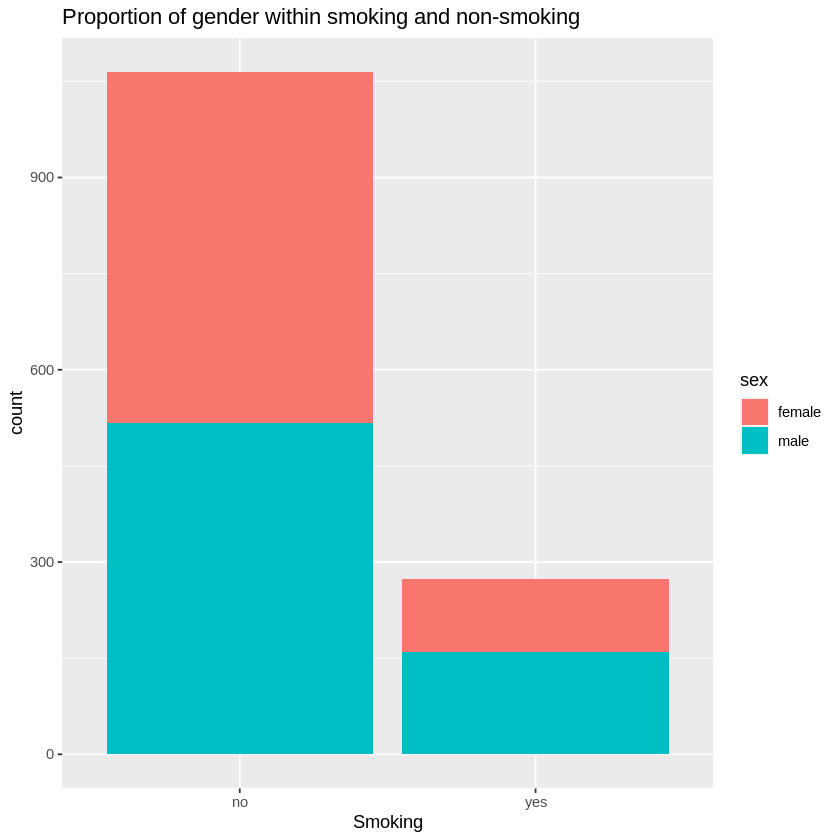

In [7]:
plot1 <- insurance %>%
    ggplot() +
    geom_bar(aes(x=as.factor(smoker), fill = sex)) +
    ggtitle("Proportion of gender within smoking and non-smoking") +
    xlab("Smoking")
plot1

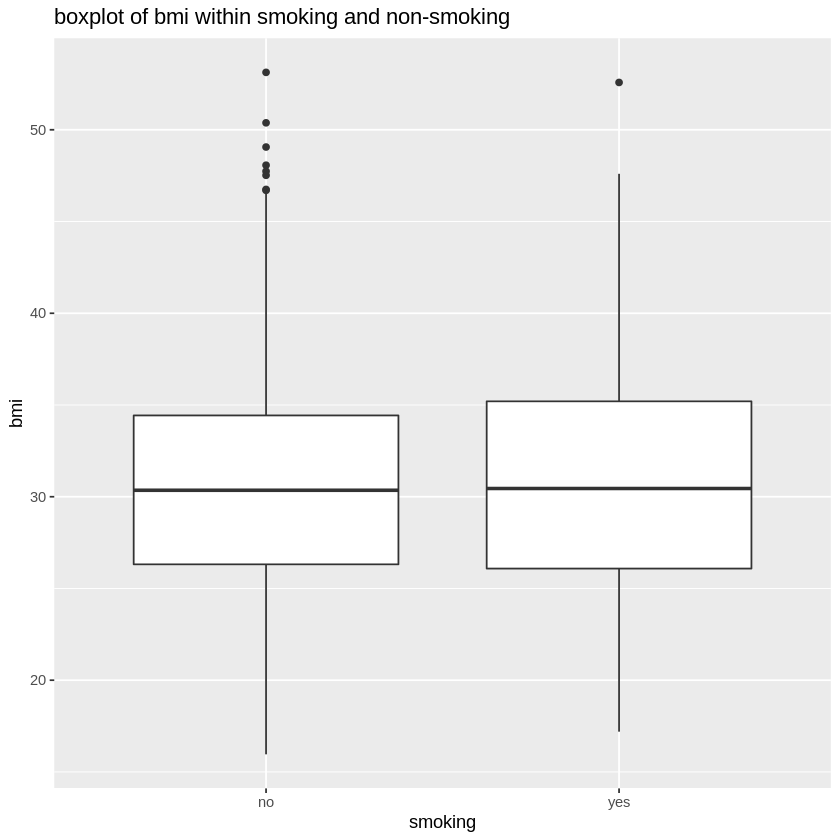

In [8]:
plot2 <- ggplot(insurance, aes(x=as.factor(smoker), y=bmi)) +
    geom_boxplot() +
    ggtitle("boxplot of bmi within smoking and non-smoking") +
    xlab("smoking")
plot2

Fortunately, the groups look like they are well represented in both groups.

Now, we want to plot our estimates to help us figure out our alternative hypothesis.

In [9]:
insurance_estimates <- insurance %>%
    group_by(smoker) %>%
    summarize(mean = mean(charges), sd = sd(charges)) 

insurance_estimates

smoker,mean,sd
<chr>,<dbl>,<dbl>
no,8434.268,5993.782
yes,32050.232,11541.547


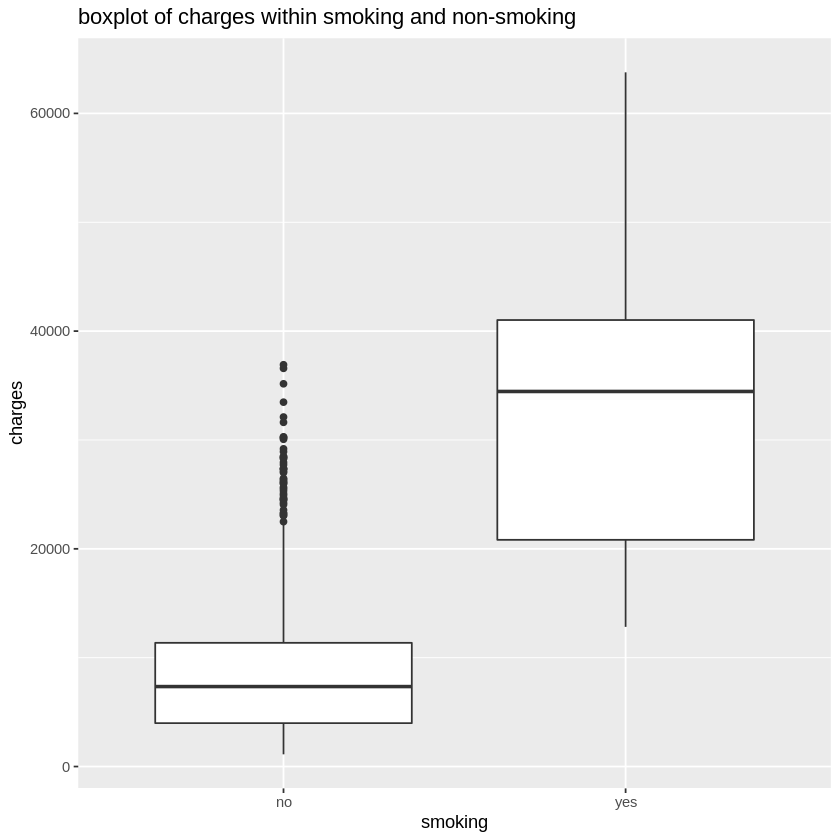

In [10]:
plot3 <- ggplot(insurance, aes(x=as.factor(smoker), y=charges)) +
    geom_boxplot() +
    ggtitle("boxplot of charges within smoking and non-smoking") +
    xlab("smoking")
plot3

Our plot above show that non-smoking has a significantly lower mean insurance charge than smoking, hence our alternative hypothesis will be $\mu_{\text{smokers}} - \mu_{\text{non-somkers}}>0$

Finally, we want to know the distribution of our sample, highlighting the mean of each group.

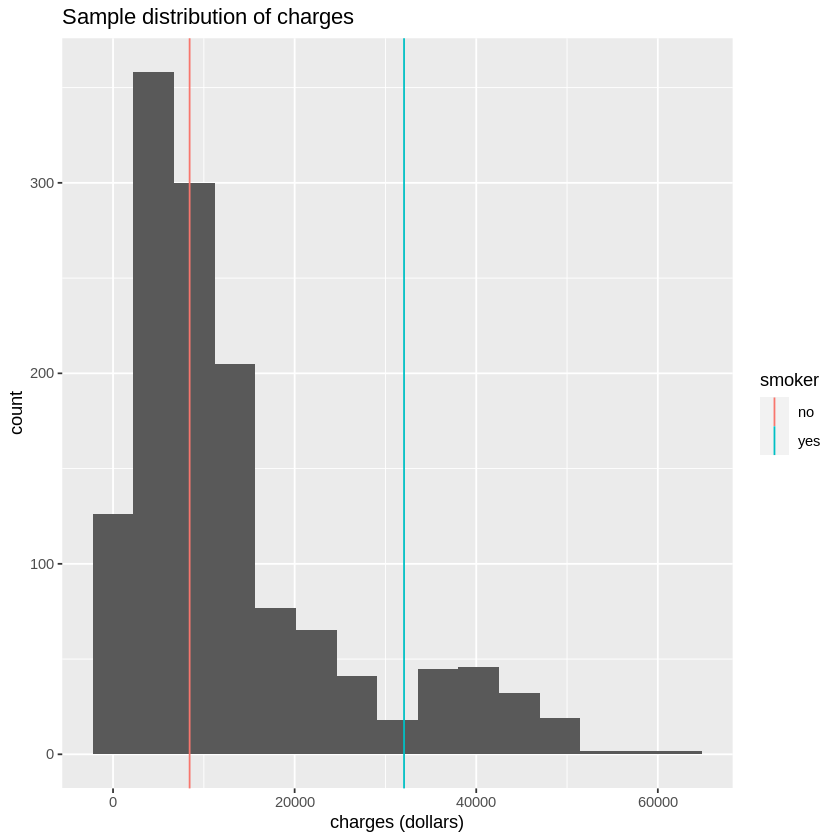

In [11]:
plot4 <- insurance %>%
    ggplot(aes(x = charges)) +
    geom_histogram(bins = 15) +
    ggtitle("Sample distribution of charges") +
    xlab("charges (dollars)") +
    geom_vline(data = insurance_estimates, aes(xintercept = mean, color = smoker)) 
plot4

In [8]:
# select columns of interest
insurance <- insurance %>%
    select(smoker, charges) %>%
    filter(!is.na(charges))

head(insurance)

smoker,charges
<chr>,<dbl>
yes,16884.924
no,1725.552
no,4449.462
no,21984.471
no,3866.855
no,3756.622


## Methods: Plan

The previous sections will carry over to your final report (you’ll be allowed to improve them based on feedback you get). Begin this Methods section with a brief description of “the good things” about this report – specifically, in what ways is this report trustworthy?

Continue by explaining why the plot(s) and estimates that you produced are not enough to give to a stakeholder, and what you should provide in addition to address this gap. Make sure your plans include at least one hypothesis test and one confidence interval. If possible, compare both the bootstrapping and asymptotics methods.

Finish this section by reflecting on how your final report might play out:

What do you expect to find?
What impact could such findings have?
What future questions could this lead to?

- What is your point estimate?
- How do you quantify the errors of your estimates?
- How do you establish statistical significance of your findings?
- What do you expect to find?
- What are the potential challenges/drawbacks?
- How do you make sure your analysis is reproducible?

To answer the question, we will conduct a hyptohesis test using the mean difference between yearly insurance charges of smokers versus non smokers in the United States as our point estimate.

$$H_0: \mu_{\text{smokers}} - \mu_{\text{non-somkers}}=0$$

$$H_1:\mu_{\text{smokers}} - \mu_{\text{non-somkers}}>0$$ 
Since the smokers group and the non smoker group are indepentdent and the distribution is not normal, we will use the following two-sample t-test:

$$
T = \frac{\bar{x}_{\text{smokers}} - \bar{x}_{\text{non-somkers}}}{\sqrt{\frac{s^2_{\text{smokers}}}{n_1}+\frac{s^2_{\text{non-somkers}}}{n_2}}}
$$

where $\bar{x}_{\text{smokers}}$ and $\bar{x}_{\text{non-somkers}}$ are the sample means of yearly insurance charges of smokers and non smokers group respectively; $s^2_{\text{smokers}}$ and $s^2_{\text{non-somkers}}$ are the sample variances for smokers and non smokers group; and $n_1$ and $n_2$ are the sample size for smokers and non smokers group.


To make our estimation more precise, we will use the bootstrapping method to simulate the null distribution.

Then we will calculate the p-value, which is the probability of how unusual the data results are if $H_0: \mu_{\text{smokers}} - \mu_{\text{non-somkers}}=0$ is true. By assigning a 5% significant level, the p-value will be compared with the significant level, deciding whether reject $H_0$ or not.

We will calculate the 95% confidence interval for our test statistic to get a better sense of the spread of the data and have another data point to comment on our findings other than just the p value.

We will also calculate the probabilities of Type I and Type II Errors and take steps to reduce their likelehood such as using a low significance level and using as large a sample size we can, and report these probabilities along with the power of our test to comment on the likelhood of our conclusions being wrong.

Through this analysis, We expect to find that the people who smoke are charged more for health insurance than those who do not in the United States, which means that we expect to reject $H_0$. If our estimate is reasonably accurate, then people can control their insurance costs based on their smoking habits. What's more, the smoker might quit smoking to improve their health, thus decreasing their insurance costs. This study could also lead to further questions regarding if this anaylsis applies to other countries, with different insurance laws and smoking levels.

While our expected result is to see a correlation between if people smoke and their insurance costs, there are many other factors impacting that impact these costs. As a result, we must be careful reporting a direct relationship when many other factors could also influence insurance charges, and our relatively small sample size compared to the size of the population could lead us to report a relationship that does not exist for the whole population. For these reasons we calculate the confidence interval, Type I Error, and Type II Errors to reduce the risk of such false conclusions from occuring. 

A future question this could lead to would be if this conclusion applies to different countries? (becuase of smoking cultures and consumption levels)

## References

Datta, A. (2019) <i>US Health Insurance Dataset</i> [Data set]. Kaggle. https://www.kaggle.com/datasets/teertha/ushealthinsurancedataset

Keisler-Starkey, K., & Bunch, L.N. (2022, September 13). <i>Health Insurance Coverage in the United States: 2021</i>. United States Census Bureau.     
    https://www.census.gov/library/publications/2022/demo/p60-278.html#:~:text=Highlights,8.6%20percent%20or%2028.3%20million

Fontinelle, A. (2022, March 2). <i>How Much Does Health Insurance Cost?</i>. Investopedia. 
    https://www.investopedia.com/how-much-does-health-insurance-cost-4774184